In [1]:
#Feature Engineering Write Up . . .
#
#Feature Engineering is the process of transforming raw data into features that better represent
#the underlying problem in predictive models to improve accuracy of unseen data.  Domain knowledge 
#is required to create features and a feature is defined as an individual characteristic of an object. 

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Getting data
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['spam', 'message']

In [6]:
keywords = ['buy', 'cash', 'offer', 'winner', 'free', 'urgent','click']

for key in keywords:
    sms_raw[str(key)] = sms_raw.message.str.contains(' ' + str(key) + ' ',case=False)

In [7]:
sms_raw['allcaps'] = sms_raw.message.str.isupper()
sms_raw['spam'] = (sms_raw['spam'] == 'spam')

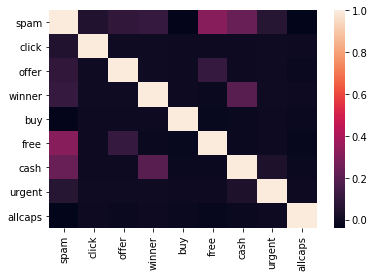

In [8]:
sns.heatmap(sms_raw.corr())

In [10]:
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 5572 points : 604
